In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from functools import reduce
from cobra.io import read_sbml_model, load_json_model, load_matlab_model

In [2]:
icho1766 = read_sbml_model('../Data/reconciliation/models/iCHOv1_final.xml')
icho2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
icho2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
iCHO3000 = load_json_model('iCHOv3_CHO_17012024.json')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-24


In [14]:
#### --- Calculate the amount of reactions per Subsystem ---- ####

#iCHO 1766
subs = []
for reaction in icho1766.reactions:
    subs.append(reaction.subsystem.upper())
    
icho1766_subs = Counter(subs)

#iCHO 2291
subs = []
for reaction in icho2291.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2291_subs = Counter(subs)

# iCHO 2101
subs = []
for reaction in icho2101.reactions:
    subs.append(reaction.subsystem.upper())
    
icho2101_subs = Counter(subs)

#iCHO 3000
subs = []
for reaction in iCHO3000.reactions:
    subs.append(reaction.subsystem.upper())
    
iCHO3000_subs = Counter(subs)

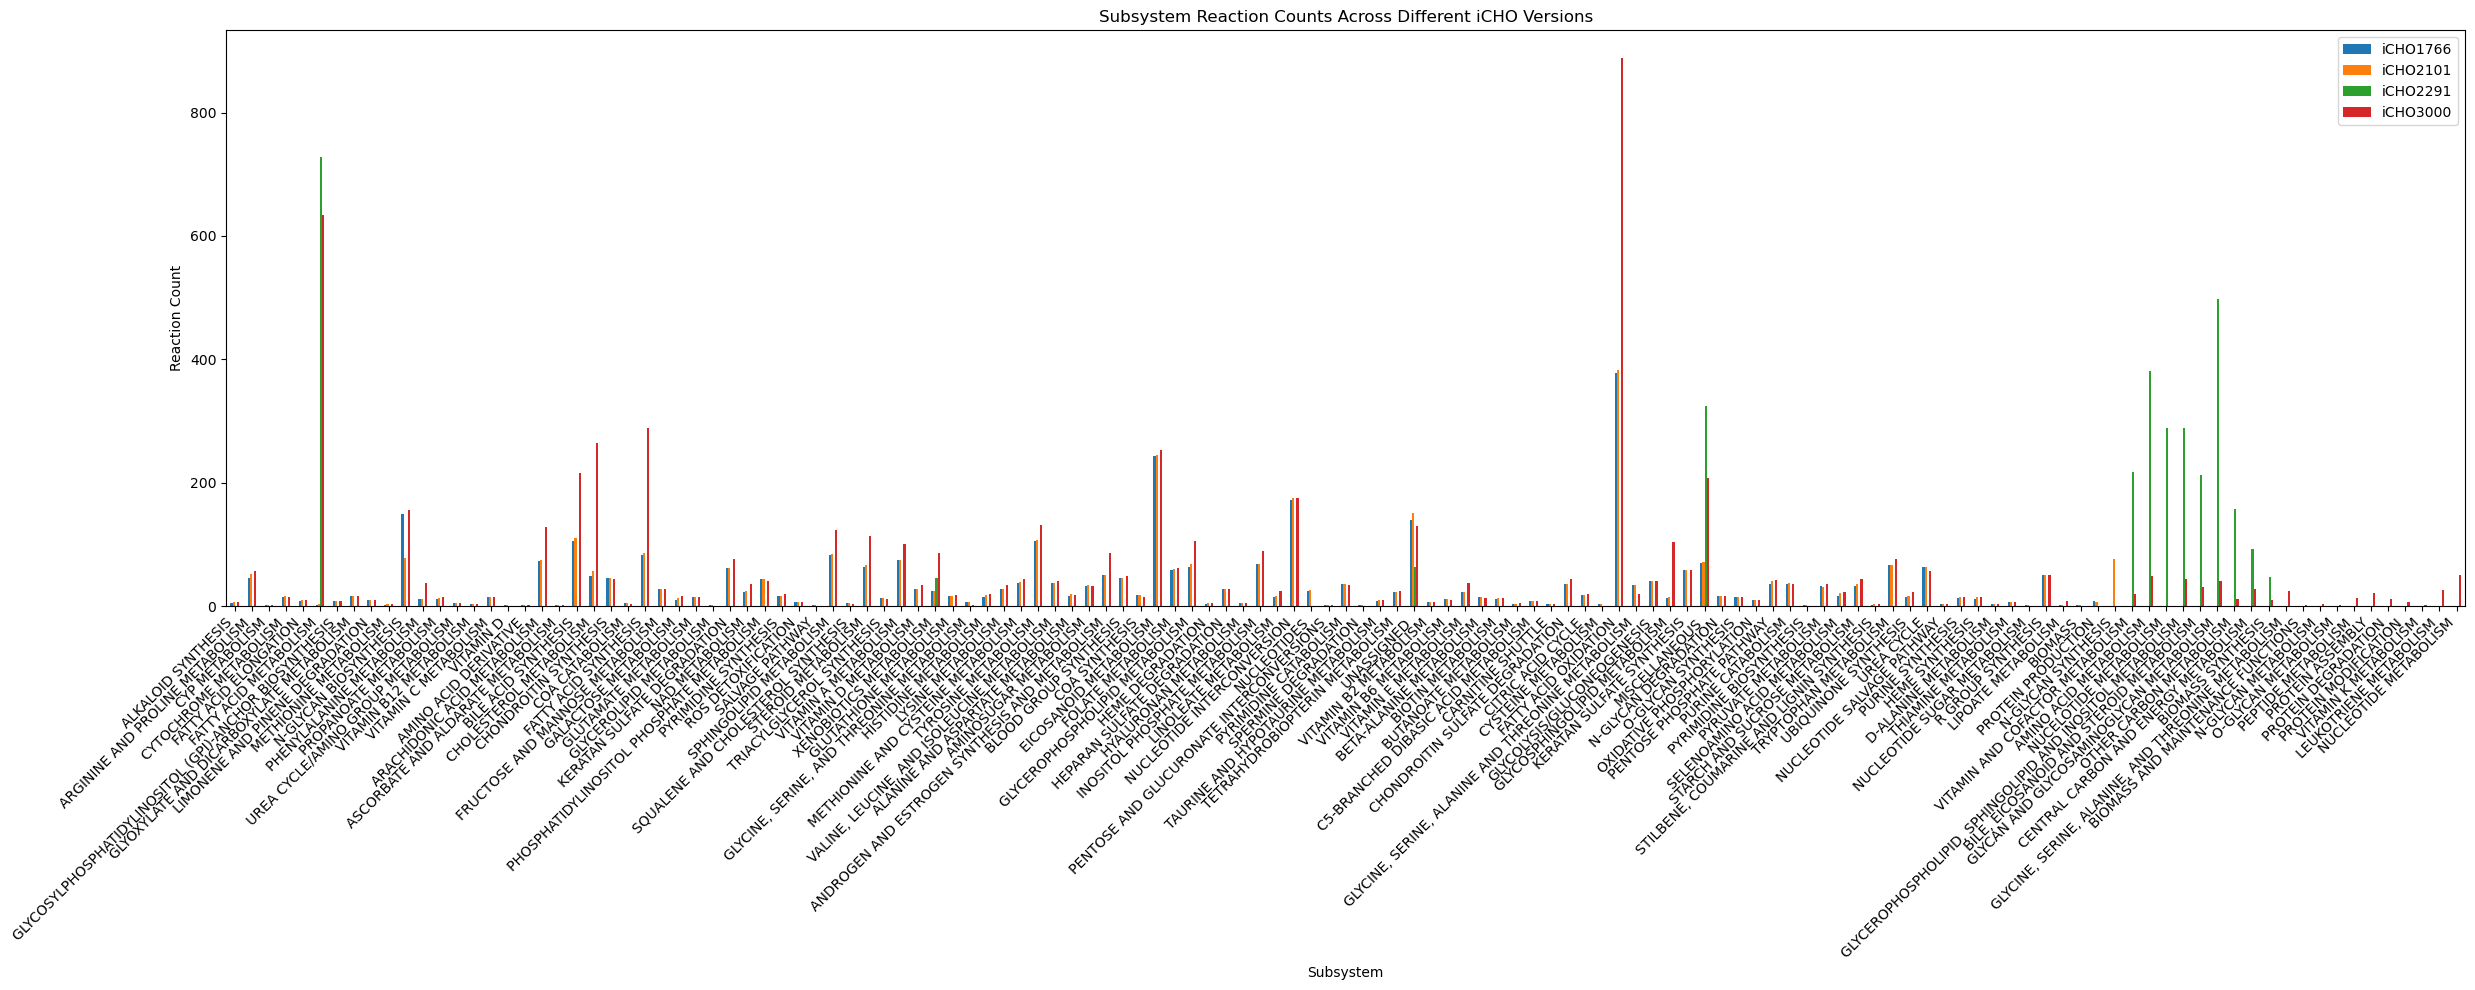

In [20]:
# Convert Counters to DataFrames
df_icho1766 = pd.DataFrame.from_dict(icho1766_subs, orient='index', columns=['iCHO1766'])
df_icho2291 = pd.DataFrame.from_dict(icho2291_subs, orient='index', columns=['iCHO2291'])
df_icho2101 = pd.DataFrame.from_dict(icho2101_subs, orient='index', columns=['iCHO2101'])
df_iCHO3000 = pd.DataFrame.from_dict(iCHO3000_subs, orient='index', columns=['iCHO3000'])

# Combine the DataFrames
combined_df = pd.concat([df_icho1766, df_icho2101, df_icho2291, df_iCHO3000], axis=1).fillna(0)

# Create a mask where each row is True if all its values are non-zero
#non_zero_mask = (combined_df != 0).all(axis=1)

# Apply the mask to filter out rows with any zero values
#filtered_df = combined_df[non_zero_mask]

# Create a mask where each row is True if the index does not start with "Transport"
mask = ~combined_df.index.str.startswith('TRANSPORT') & ~combined_df.index.str.startswith("EXCHANGE") & ~combined_df.index.str.startswith("SINK") & ~combined_df.index.str.startswith("DEMAND") & ~combined_df.index.str.startswith("INTRACELLULAR") & ~combined_df.index.str.startswith("EXTRACELLULAR")


# Apply the mask to the DataFrame to keep only rows that do not start with "Transport"
filtered_df = combined_df[mask]

# Plot
filtered_df.plot(kind='bar', figsize=(25, 10))
plt.title('Subsystem Reaction Counts Across Different iCHO Versions')
plt.xlabel('Subsystem')
plt.ylabel('Reaction Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()
